# Chapter Goals
- Extending algorithms to overcome some shortcomings of naive methods.

# General Lab Guidlines
- Visualization.
- Modifiable code snippets.

---

In [ ]:
# Loading a dataset
# dataset names: "airline", "breast-cancer", "contact-lenses", "cpu", "cpu.with.vendor", "credit-g", "diabetes", "glass", "hypothyroid", "ionosphere", "iris.2D", "iris", "labor", "segment-challenge", "segment-test", "soybean", "supermarket", "unbalanced", "vote", "weather.nominal", "weather.numeric"
# df = pd.read_csv("data/weather.numeric.csv")
# instances = loader.load_file("data/weather.numeric.arff")

# Modules & Datasets Setup

In [ ]:
# @title
!apt-get install default-jdk
!apt install libgraphviz-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
default-jdk is already the newest version (2:1.11-72build2).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgraphviz-dev is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [ ]:
# @title
!pip install pygraphviz
!pip install python-javabridge
!pip install python-weka-wrapper3
!pip install sklearn-weka-plugin

  Using cached sklearn-weka-plugin-0.0.7.tar.gz (69 kB)
  Preparing metadata (setup.py) ... done
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
# @title
#Restart runtime after installing the dependencies

In [ ]:
# @title
import os
import glob
import numpy as np
import pandas as pd
import weka.core.jvm as jvm
from weka.core import converters
import matplotlib.pyplot as plt

In [ ]:
# @title
data_dir = 'data'

In [ ]:
# @title
#!rm -r weka
#!rm -r data

In [ ]:
# @title
#jvm.stop()
jvm.start(packages=True)

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['/usr/local/lib/python3.10/dist-packages/javabridge/jars/rhino-1.7R4.jar', '/usr/local/lib/python3.10/dist-packages/javabridge/jars/runnablequeue.jar', '/usr/local/lib/python3.10/dist-packages/javabridge/jars/cpython.jar', '/usr/local/lib/python3.10/dist-packages/weka/lib/core.jar', '/usr/local/lib/python3.10/dist-packages/weka/lib/python-weka-wrapper.jar', '/usr/local/lib/python3.10/dist-packages/weka/lib/mtj.jar', '/usr/local/lib/python3.10/dist-packages/weka/lib/weka.jar', '/usr/local/lib/python3.10/dist-packages/weka/lib/arpack_combined.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support enabled


In [ ]:
# @title
# Preparing Datasets
if not os.path.exists(data_dir):
    !mkdir $data_dir
    for file in ['airline.arff', 'breast-cancer.arff', 'contact-lenses.arff', 'cpu.arff', 'cpu.with.vendor.arff', 'credit-g.arff', 'diabetes.arff', 'glass.arff', 'hypothyroid.arff', 'ionosphere.arff', 'iris.2D.arff', 'iris.arff', 'labor.arff', 'segment-challenge.arff', 'segment-test.arff', 'soybean.arff', 'supermarket.arff', 'unbalanced.arff', 'vote.arff', 'weather.nominal.arff', 'weather.numeric.arff',]:
        url = 'https://git.cms.waikato.ac.nz/weka/weka/-/raw/main/trunk/wekadocs/data/' + file
        !wget -P $data_dir $url
    loader = converters.Loader(classname="weka.core.converters.ArffLoader")
    saver = converters.Saver(classname="weka.core.converters.CSVSaver")
    for file in glob.glob(os.path.join(data_dir, '*.arff')):
        dataset = loader.load_file(file)
        filename, file_extension = os.path.splitext(file)
        saver.save_file(dataset, filename + '.csv')
    !wget -P $data_dir https://raw.githubusercontent.com/Rytuo/ITMO-CT/master/Others/AdvancedML/data/OpenML/data/1438.arff
    !rm -r weka

In [ ]:
# @title
import weka.core.packages as packages
packages.install_package("simpleEducationalLearningSchemes")
packages.install_package("generalizedSequentialPatterns")
packages.install_package("classAssociationRules")
packages.install_package("NNge")
packages.install_package("LibSVM")

from weka.core.converters import Loader
loader = Loader(classname="weka.core.converters.ArffLoader")

# 7.1 Instance-based Learning

Sources
- [NNge, Weka's sourceforge](https://weka.sourceforge.io/doc.packages/NNge/weka/classifiers/rules/NNge.html) - Build the Nearest-neighbor-like algorithm using non-nested eneralized exemplars. Hyperrectangles that can be viewed as if-then rules.
- [SVC, Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) - C-Support Vector Classification.



## Weighted Attributes

In [ ]:
# Weighted Euclidean Distance Function

import numpy as np

def weighted_euclidean_distance(x, y, weights):

    # Calculate the squared differences, multiply by weights, and sum them up
    squared_diff = np.sum(weights * (x - y)**2)

    # Take the square root to get the final distance
    distance = np.sqrt(squared_diff)

    return distance

In [ ]:
# Distance computed

x1 = np.array([1, 2, 3])
y1 = np.array([4, 5, 6])
weights1 = np.array([0.5, 1.0, 2.0])

weighted_euclidean_distance(x1, y1, weights1)

5.612486080160912

In [ ]:
# Same instances but with different weights

weights2 = np.array([1.0, 2.0, 3.0])

weighted_euclidean_distance(x1, y1, weights2)

7.3484692283495345

**Task 7.1.1** Select weights that yields a distance less than 5.

## Reducing the number of exemplars

In [ ]:
# Dummy SVC classifier

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Generate dummy data
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_clusters_per_class=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Support Vector Machine classifier
classifier = SVC(kernel='linear', random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

In [ ]:
# Only add misclassified instances to a new list

# Loop through the data and add correctly classified rows to a list
misclassified_data = []

for i in range(len(X_test)):
    if y_test[i] != y_pred[i]:
        misclassified_data.append((X_test[i], y_test[i]))

misclassified_data

[(array([ 0.16451511, -0.38383538,  0.57212572, -0.50499976,  0.36080209,
         -0.92793647, -0.66985931,  2.04225784,  0.27598449,  1.42747822]),
  0),
 (array([ 1.92418868,  2.8212828 ,  0.80425627,  1.24720468,  1.81907914,
          1.63973165,  4.55981909,  0.64265673, -1.29470518, -2.63876677]),
  0),
 (array([ 1.93893246,  1.85237273, -0.36356204, -1.78003996,  1.94211163,
         -0.72864596,  0.49785062, -1.08487878, -1.69349909,  1.97531423]),
  1),
 (array([ 0.81464654,  1.87091519,  0.22650535, -0.42633922,  0.14788824,
          0.48660587,  0.46576246,  0.46005434, -1.99508047, -1.03431896]),
  0),
 (array([-0.7441206 , -0.1660458 ,  0.0552561 , -1.62385894,  1.00775365,
         -1.30471297, -1.56555072, -0.48414713,  1.927813  ,  2.12633032]),
  1),
 (array([ 1.78796655, -0.48391738, -1.18384264, -0.4064744 ,  0.73391788,
         -0.31168967,  0.6396662 , -0.93644605, -0.03255022,  2.14965924]),
  0),
 (array([ 0.26359651, -1.51824297, -0.7790524 , -2.08280932,  2.

**Task 7.1.2** Train a model only on the subset of misclassified data. Compare evaluation metrics of it with the original dataset.

## Pruning Noisy Exemplars

In [ ]:
# Dummy SVC classifier

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Generate dummy data
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_clusters_per_class=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Support Vector Machine classifier
classifier = SVC(kernel='linear', random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

In [ ]:
# Only add correctly classified instances

# Loop through the data and add correctly classified rows to a list
correctly_classified_data = []

for i in range(len(X_test)):
    if y_test[i] == y_pred[i]:
        correctly_classified_data.append((X_test[i], y_test[i]))

# Print the correctly classified data
print("\nCorrectly classified data:")
for data_point in correctly_classified_data:
    print(f"Features: {data_point[0]}, True Label: {data_point[1]}")


Correctly classified data:
Features: [ 0.5378166   3.04473816 -0.86943275 -0.39387338  1.38778695  2.54467197
  2.89093355  0.39856407  1.66701271 -2.74680967], True Label: 0
Features: [ 1.17973229 -1.02175785 -0.01786658 -1.3618804  -1.22224382  0.29348953
 -1.80166455  1.19827604 -1.31477345  2.11574554], True Label: 1
Features: [ 0.12080215  0.05518365  0.09293023 -2.94773011  0.11233761  0.35861598
 -2.19223012 -0.4286748   0.33736307  2.42252899], True Label: 0
Features: [-2.29406671 -2.15676964  0.75880093  0.39214952  3.64558143  0.5103278
  3.04138398  1.5749487   0.49462464  1.47917748], True Label: 0
Features: [ 1.08886291  1.83506393 -0.4700715  -0.5677211   1.10867507  0.25247179
  1.1434596   0.35140667  1.11162215 -0.26872452], True Label: 0
Features: [ 0.63701621  1.09821927 -0.38187934 -0.96997451  0.79037445  0.80506646
  0.65388853  1.21696886 -0.83953924  0.11651484], True Label: 0
Features: [-0.91213648 -0.45535477 -0.36389379 -1.38009834  0.21566169  1.31679045
 -

**Task 7.1.3** Train a model on some dataset, Compute the accuracy, Apply the given technique, Then re-compute the accuracy.

## Generalizing Exemplars

In [ ]:
# load data
instances = loader.load_file("data/ionosphere.arff")

In [ ]:
instances

@relation ionosphere

@attribute a01 numeric
@attribute a02 numeric
@attribute a03 numeric
@attribute a04 numeric
@attribute a05 numeric
@attribute a06 numeric
@attribute a07 numeric
@attribute a08 numeric
@attribute a09 numeric
@attribute a10 numeric
@attribute a11 numeric
@attribute a12 numeric
@attribute a13 numeric
@attribute a14 numeric
@attribute a15 numeric
@attribute a16 numeric
@attribute a17 numeric
@attribute a18 numeric
@attribute a19 numeric
@attribute a20 numeric
@attribute a21 numeric
@attribute a22 numeric
@attribute a23 numeric
@attribute a24 numeric
@attribute a25 numeric
@attribute a26 numeric
@attribute a27 numeric
@attribute a28 numeric
@attribute a29 numeric
@attribute a30 numeric
@attribute a31 numeric
@attribute a32 numeric
@attribute a33 numeric
@attribute a34 numeric
@attribute class {b,g}

@data
1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1,0.0376,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0

In [ ]:
# set class index to be last attribute
instances.class_index = instances.num_attributes - 1

In [ ]:
# build the Nearest-neighbor-like algorithm using non-nested generalized exemplars
# hyperrectangles that can be viewed as if-then rules

from weka.classifiers import Classifier
cls = Classifier(classname="weka.classifiers.rules.NNge")
cls.build_classifier(instances)

In [ ]:
cls.description

<bound method OptionHandler.description of 
NNGE classifier

Rules generated :
	class g IF : a01=1.0 ^ a02=0.0 ^ 0.79847<=a03<=1.0 ^ -0.07572<=a04<=0.45455 ^ 0.73638<=a05<=1.0 ^ -0.16964<=a06<=0.71429 ^ 0.66667<=a07<=1.0 ^ -0.07653<=a08<=0.71429 ^ 0.84881<=a09<=1.0 ^ -0.49962<=a10<=-0.07398 ^ 0.66026<=a11<=1.0 ^ -0.14286<=a12<=0.6132 ^ 0.77937<=a13<=1.0 ^ -0.45455<=a14<=0.48981 ^ 0.63636<=a15<=1.0 ^ -0.07399<=a16<=0.58986 ^ -0.375<=a17<=1.0 ^ -0.63636<=a18<=1.0 ^ 0.59615<=a19<=1.0 ^ -0.27273<=a20<=0.59862 ^ 0.52494<=a21<=1.0 ^ -0.45455<=a22<=0.92001 ^ 0.45582<=a23<=1.0 ^ -0.25101<=a24<=1.0 ^ 0.28571<=a25<=1.0 ^ -0.28571<=a26<=1.0 ^ 0.3293<=a27<=1.0 ^ -0.06995<=a28<=1.0 ^ 0.27381<=a29<=1.0 ^ -0.0763<=a30<=1.0 ^ 0.22427<=a31<=1.0 ^ -0.1875<=a32<=1.0 ^ 0.18086<=a33<=1.0 ^ -0.07439<=a34<=1.0  (13)
	class g IF : a01=1.0 ^ a02=0.0 ^ 0.61538<=a03<=0.95559 ^ -0.13241<=a04<=0.18923 ^ 0.53755<=a05<=0.98994 ^ -0.13244<=a06<=0.16996 ^ 0.72727<=a07<=0.94982 ^ -0.00461<=a08<=0.12877 ^ 0.65077<=a09<=

**Task 7.1.4** Modify the classifier's parameters. `G` is number of attempts of generalization, and `I` is number of rectangles

```
cls = Classifier(classname="weka.classifiers.rules.NNge", options=["-G", "100", "-I", "10"])
```

## Distance Functions For Generalized Exemplars

In [ ]:
# load the data
instances = loader.load_file("data/weather.numeric.arff")

In [ ]:
instances

@relation weather

@attribute outlook {sunny,overcast,rainy}
@attribute temperature numeric
@attribute humidity numeric
@attribute windy {TRUE,FALSE}
@attribute play {yes,no}

@data
sunny,85,85,FALSE,no
sunny,80,90,TRUE,no
overcast,83,86,FALSE,yes
rainy,70,96,FALSE,yes
rainy,68,80,FALSE,yes
rainy,65,70,TRUE,no
overcast,64,65,TRUE,yes
sunny,72,95,FALSE,no
sunny,69,70,FALSE,yes
rainy,75,80,FALSE,yes
sunny,75,70,TRUE,yes
overcast,72,90,TRUE,yes
overcast,81,75,FALSE,yes
rainy,71,91,TRUE,no

In [ ]:
# set class to be the last attribute
instances.class_index = instances.num_attributes - 1

In [ ]:
# build the Nearest-neighbor-like algorithm using non-nested generalized exemplars
# hyperrectangles that can be viewed as if-then rules

from weka.classifiers import Classifier
cls = Classifier(classname="weka.classifiers.rules.NNge")
cls.build_classifier(instances)

In [ ]:
# see the rectangles picture in page 249
cls.description

<bound method OptionHandler.description of 
NNGE classifier

Rules generated :
	class no IF : outlook in {rainy} ^ 65.0<=temperature<=71.0 ^ 70.0<=humidity<=91.0 ^ windy in {TRUE}  (2)
	class yes IF : outlook in {overcast} ^ temperature=72.0 ^ humidity=90.0 ^ windy in {TRUE}  (1)
	class yes IF : outlook in {overcast,rainy} ^ 68.0<=temperature<=83.0 ^ 75.0<=humidity<=96.0 ^ windy in {FALSE}  (5)
	class yes IF : outlook in {sunny,overcast} ^ 64.0<=temperature<=75.0 ^ 65.0<=humidity<=70.0 ^ windy in {TRUE,FALSE}  (3)
	class no IF : outlook in {sunny} ^ 72.0<=temperature<=85.0 ^ 85.0<=humidity<=95.0 ^ windy in {TRUE,FALSE}  (3)

Stat :
	class yes : 3 exemplar(s) including 2 Hyperrectangle(s) and 1 Single(s).
	class no : 2 exemplar(s) including 2 Hyperrectangle(s) and 0 Single(s).

	Total : 5 exemplars(s) including 4 Hyperrectangle(s) and 1 Single(s).

	Feature weights : [0.24674981977443894 0.19996253177061085 0.21886699651992553 0.04812703040826924]

>

In [ ]:
# classify the last instance
instances.get_instance(instances.num_instances - 1)

# euclidean distance is used if the instance is outside all rectangles

rainy,71,91,TRUE,no

In [ ]:
# create a new instance, add it to the dataset, its schema is attached

from weka.core.dataset import Instance

# rainy, 71, 91, True, no
values = [2, 71, 91, 0, 0]
inst = Instance.create_instance(values)
instances.add_instance(inst)

In [ ]:
# show the last instance, we just added
instances.get_instance(instances.num_instances - 1)

rainy,71,91,TRUE,yes

In [ ]:
# classify the last instance, we just added
cls.classify_instance(
    instances.get_instance(
        instances.num_instances - 1
    )
  )

1.0

**Task 7.1.5** Query an instance outside the rectangles.

## ~~Generalized Distance Functions~~

# 7.2 Extending Linear Models

Sources
- [SMO, Sourceforge](https://weka.sourceforge.io/doc.dev/weka/classifiers/functions/SMO.html) - Implements John Platt's sequential minimal optimization algorithm for training a support vector classifier.

## The Maximum Margin Hyperplane

In [ ]:
# load the data
instances = loader.load_file("data/ionosphere.arff")

In [ ]:
# set the class index to be the last attribute
instances.class_index = instances.num_attributes - 1

In [ ]:
# build the classifier

# Implements John Platt's sequential minimal optimization algorithm for training a support vector classifier.
# This implementation globally replaces all missing values
# transforms nominal attributes into binary ones
# normalizes all attributes by default.

from weka.classifiers import Classifier
cls = Classifier(classname="weka.classifiers.functions.SMO")
cls.build_classifier(instances)

In [ ]:
cls.description

<bound method OptionHandler.description of SMO

Kernel used:
  Linear Kernel: K(x,y) = <x,y>

Classifier for classes: b, g

BinarySMO

Machine linear: showing attribute weights, not support vectors.

         2.7284 * (normalized) a01
 +       1.2922 * (normalized) a03
 +       0.496  * (normalized) a04
 +       1.25   * (normalized) a05
 +       1.0747 * (normalized) a06
 +       1.3562 * (normalized) a07
 +       1.7094 * (normalized) a08
 +       0.662  * (normalized) a09
 +       0.3239 * (normalized) a10
 +      -0.3074 * (normalized) a11
 +      -0.2181 * (normalized) a12
 +      -0.3015 * (normalized) a13
 +       0.5468 * (normalized) a14
 +       0.5205 * (normalized) a15
 +      -0.3385 * (normalized) a16
 +       0.1632 * (normalized) a17
 +       0.1591 * (normalized) a18
 +      -0.3796 * (normalized) a19
 +       0.0701 * (normalized) a20
 +       0.2769 * (normalized) a21
 +      -1.6155 * (normalized) a22
 +       0.9716 * (normalized) a23
 +       0.2532 * (normalized)

**Task 7.2.1** Apply the code snippet on a dataset of two attributes, and visualize the hyperplane like page 253 of the book

## Nonlinear Class Boundaries

### Using the kernel in weka's classifiers

In [ ]:
# load the data
instances = loader.load_file("data/ionosphere.arff")

In [ ]:
# set the class to be the last attribute
instances.class_index = instances.num_attributes - 1

In [ ]:
# Build the classifier

# Implements John Platt's sequential minimal optimization algorithm for training a support vector classifier.
# This implementation globally replaces all missing values
# transforms nominal attributes into binary ones
# normalizes all attributes by default.

from weka.classifiers import Classifier
cls = Classifier(classname="weka.classifiers.functions.SMO", options=["-K", "weka.classifiers.functions.supportVector.PolyKernel"])
cls.build_classifier(instances)

In [ ]:
cls.description

<bound method OptionHandler.description of SMO

Kernel used:
  Linear Kernel: K(x,y) = <x,y>

Classifier for classes: b, g

BinarySMO

Machine linear: showing attribute weights, not support vectors.

         2.7284 * (normalized) a01
 +       1.2922 * (normalized) a03
 +       0.496  * (normalized) a04
 +       1.25   * (normalized) a05
 +       1.0747 * (normalized) a06
 +       1.3562 * (normalized) a07
 +       1.7094 * (normalized) a08
 +       0.662  * (normalized) a09
 +       0.3239 * (normalized) a10
 +      -0.3074 * (normalized) a11
 +      -0.2181 * (normalized) a12
 +      -0.3015 * (normalized) a13
 +       0.5468 * (normalized) a14
 +       0.5205 * (normalized) a15
 +      -0.3385 * (normalized) a16
 +       0.1632 * (normalized) a17
 +       0.1591 * (normalized) a18
 +      -0.3796 * (normalized) a19
 +       0.0701 * (normalized) a20
 +       0.2769 * (normalized) a21
 +      -1.6155 * (normalized) a22
 +       0.9716 * (normalized) a23
 +       0.2532 * (normalized)

**Task 7.2.2** Try different kernelization methods. See the doc from [here](https://weka.sourceforge.io/doc.dev/weka/classifiers/functions/supportVector/package-summary.html).

### Visualizing Kernel's Effect

Sources
- [SVM Kernels Plot, Scikit-learn](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html).

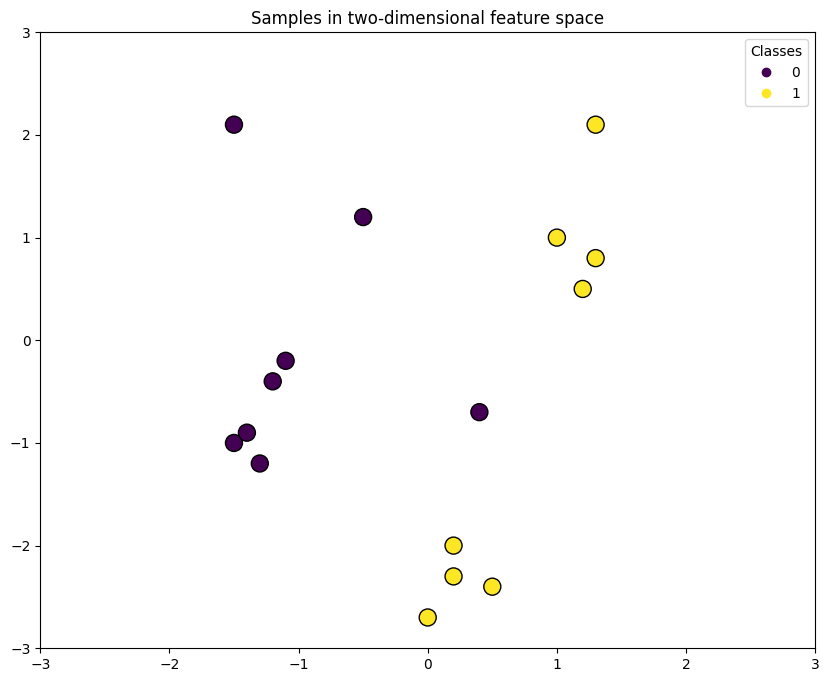

In [ ]:
# Dummy data

import matplotlib.pyplot as plt
import numpy as np

X = np.array(
    [
        [0.4, -0.7],
        [-1.5, -1.0],
        [-1.4, -0.9],
        [-1.3, -1.2],
        [-1.1, -0.2],
        [-1.2, -0.4],
        [-0.5, 1.2],
        [-1.5, 2.1],
        [1.0, 1.0],
        [1.3, 0.8],
        [1.2, 0.5],
        [0.2, -2.0],
        [0.5, -2.4],
        [0.2, -2.3],
        [0.0, -2.7],
        [1.3, 2.1],
    ]
)

y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

# Plotting settings
fig, ax = plt.subplots(figsize=(4, 3))
x_min, x_max, y_min, y_max = -3, 3, -3, 3
ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

# Plot samples by color and add legend
scatter = ax.scatter(X[:, 0], X[:, 1], s=150, c=y, label=y, edgecolors="k")
ax.figure.set_size_inches(10, 8)
ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
ax.set_title("Samples in two-dimensional feature space")
_ = plt.show()

In [ ]:
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay


def plot_training_data_with_decision_boundary(kernel):
    # Train the SVC
    clf = svm.SVC(kernel=kernel, gamma=2).fit(X, y)

    # Settings for plotting
    _, ax = plt.subplots(figsize=(4, 3))
    x_min, x_max, y_min, y_max = -3, 3, -3, 3
    ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

    # Plot decision boundary and margins
    common_params = {"estimator": clf, "X": X, "ax": ax}
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.3,
    )
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="decision_function",
        plot_method="contour",
        levels=[-1, 0, 1],
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
    )

    # Plot bigger circles around samples that serve as support vectors
    ax.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=250,
        facecolors="none",
        edgecolors="k",
    )
    # Plot samples by color and add legend
    ax.scatter(X[:, 0], X[:, 1], c=y, s=150, edgecolors="k")
    ax.figure.set_size_inches(10, 8)
    ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
    ax.set_title(f" Decision boundaries of {kernel} kernel in SVC")

    _ = plt.show()

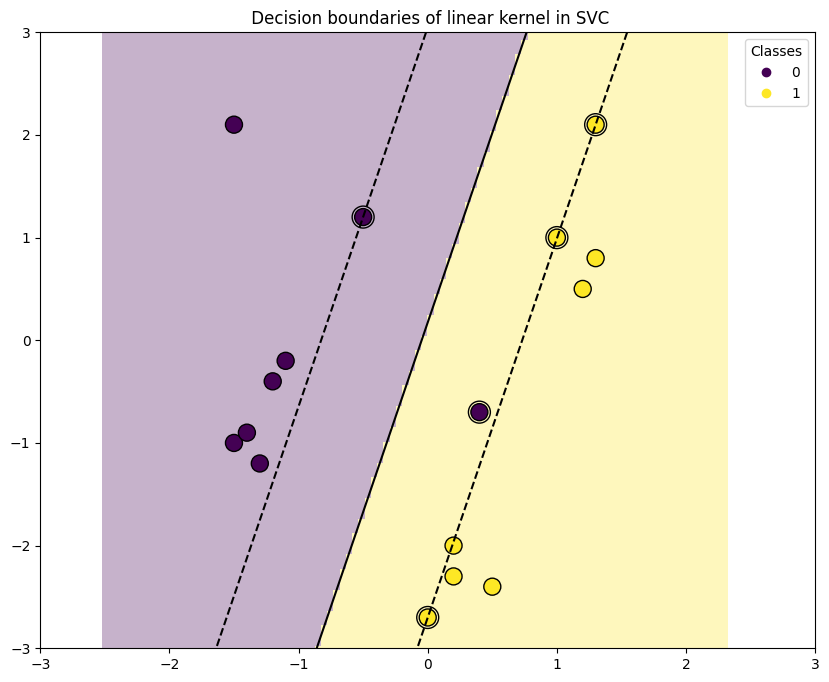

In [ ]:
# linear kernel
plot_training_data_with_decision_boundary("linear")


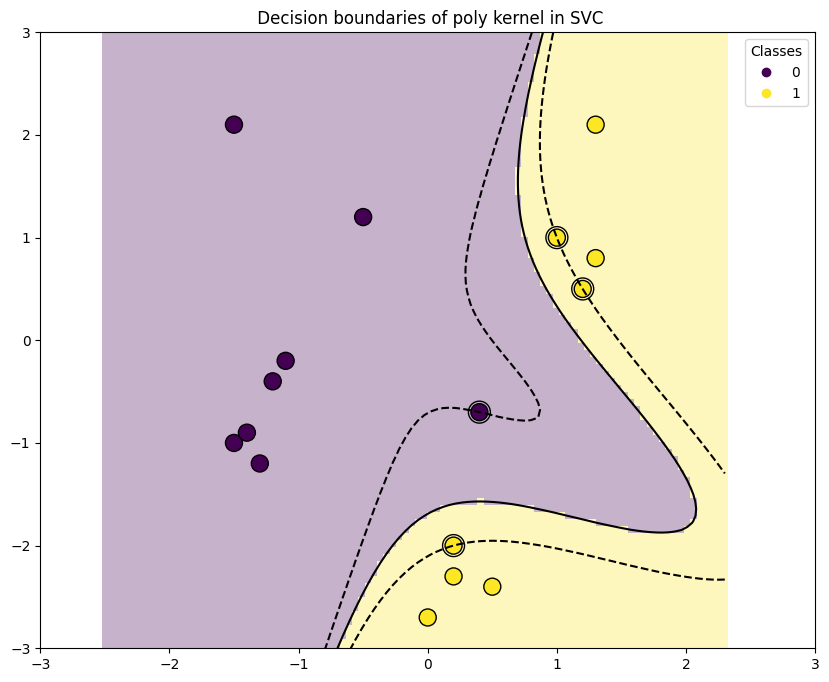

In [ ]:
# polynomial kernel
plot_training_data_with_decision_boundary("poly")


**Task 7.2.3** Tinker with the data and kernel, and compare resulting visualizations.

## Support Vector Regression

In [ ]:
# load the data
instances = loader.load_file("data/ionosphere.arff")

In [ ]:
# set the class to be the last attribute
instances.class_index = instances.num_attributes - 1

In [ ]:
# build the classifier

# Implements John Platt's sequential minimal optimization algorithm for training a support vector classifier.
# This implementation globally replaces all missing values
# transforms nominal attributes into binary ones
# normalizes all attributes by default.

from weka.classifiers import Classifier
cls = Classifier(classname="weka.classifiers.functions.SMO")
cls.build_classifier(instances)

In [ ]:
cls.description

<bound method OptionHandler.description of SMO

Kernel used:
  Linear Kernel: K(x,y) = <x,y>

Classifier for classes: b, g

BinarySMO

Machine linear: showing attribute weights, not support vectors.

         2.7284 * (normalized) a01
 +       1.2922 * (normalized) a03
 +       0.496  * (normalized) a04
 +       1.25   * (normalized) a05
 +       1.0747 * (normalized) a06
 +       1.3562 * (normalized) a07
 +       1.7094 * (normalized) a08
 +       0.662  * (normalized) a09
 +       0.3239 * (normalized) a10
 +      -0.3074 * (normalized) a11
 +      -0.2181 * (normalized) a12
 +      -0.3015 * (normalized) a13
 +       0.5468 * (normalized) a14
 +       0.5205 * (normalized) a15
 +      -0.3385 * (normalized) a16
 +       0.1632 * (normalized) a17
 +       0.1591 * (normalized) a18
 +      -0.3796 * (normalized) a19
 +       0.0701 * (normalized) a20
 +       0.2769 * (normalized) a21
 +      -1.6155 * (normalized) a22
 +       0.9716 * (normalized) a23
 +       0.2532 * (normalized)

**Task 7.2.4** Interpret the model description. Try on different datasets, and compare various interpretations.

## ~~Kernel Ridge Regression~~

## ~~The Kernel Perceptron~~

## ~~Multilayer Perceptrons~~

## ~~Radial Basis Function Networks~~

## ~~Stochastic Gradient Descent~~

# 7.3 Numeric Prediction with Local Linear Models

## Model Trees

Source
- [M5P, Weka' Sourceforge](https://weka.sourceforge.io/doc.dev/weka/classifiers/trees/M5P.html) - Implements base routines for generating M5 Model trees and rules.

In [ ]:
# load the data
instances = loader.load_file("data/cpu.arff")

In [ ]:
instances

@relation cpu

@attribute MYCT numeric
@attribute MMIN numeric
@attribute MMAX numeric
@attribute CACH numeric
@attribute CHMIN numeric
@attribute CHMAX numeric
@attribute class numeric

@data
125,256,6000,256,16,128,198
29,8000,32000,32,8,32,269
29,8000,32000,32,8,32,220
29,8000,32000,32,8,32,172
29,8000,16000,32,8,16,132
26,8000,32000,64,8,32,318
23,16000,32000,64,16,32,367
23,16000,32000,64,16,32,489
23,16000,64000,64,16,32,636
23,32000,64000,128,32,64,1144
400,1000,3000,0,1,2,38
400,512,3500,4,1,6,40
60,2000,8000,65,1,8,92
50,4000,16000,65,1,8,138
350,64,64,0,1,4,10
200,512,16000,0,4,32,35
167,524,2000,8,4,15,19
143,512,5000,0,7,32,28
143,1000,2000,0,5,16,31
110,5000,5000,142,8,64,120
143,1500,6300,0,5,32,30
143,3100,6200,0,5,20,33
143,2300,6200,0,6,64,61
110,3100,6200,0,6,64,76
320,128,6000,0,1,12,23
320,512,2000,4,1,3,69
320,256,6000,0,1,6,33
320,256,3000,4,1,3,27
320,512,5000,4,1,5,77
320,256,5000,4,1,6,27
25,1310,2620,131,12,24,274
25,1310,2620,131,12,24,368
50,2620,10480,30,12

In [ ]:
# set the class to be the last attribute
instances.class_index = instances.num_attributes - 1

In [ ]:
# build the classifier

# Implements base routines for generating M5 Model trees and rules

from weka.classifiers import Classifier
cls = Classifier(classname="weka.classifiers.trees.M5P")
cls.build_classifier(instances)

In [ ]:
cls.description

<bound method OptionHandler.description of M5 pruned model tree:
(using smoothed linear models)

CHMIN <= 7.5 : LM1 (165/12.903%)
CHMIN >  7.5 : 
|   MMAX <= 28000 : 
|   |   MMAX <= 13240 : 
|   |   |   CACH <= 81.5 : LM2 (6/18.551%)
|   |   |   CACH >  81.5 : LM3 (4/30.824%)
|   |   MMAX >  13240 : LM4 (11/24.185%)
|   MMAX >  28000 : LM5 (23/48.302%)

LM num: 1
class = 
	-0.0055 * MYCT 
	+ 0.0013 * MMIN 
	+ 0.0029 * MMAX 
	+ 0.8007 * CACH 
	+ 0.4015 * CHMAX 
	+ 11.0971

LM num: 2
class = 
	-1.0307 * MYCT 
	+ 0.0086 * MMIN 
	+ 0.0031 * MMAX 
	+ 0.7866 * CACH 
	- 2.4503 * CHMIN 
	+ 1.1597 * CHMAX 
	+ 70.8672

LM num: 3
class = 
	-1.1057 * MYCT 
	+ 0.0086 * MMIN 
	+ 0.0031 * MMAX 
	+ 0.7995 * CACH 
	- 2.4503 * CHMIN 
	+ 1.1597 * CHMAX 
	+ 83.0016

LM num: 4
class = 
	-0.8813 * MYCT 
	+ 0.0086 * MMIN 
	+ 0.0031 * MMAX 
	+ 0.6547 * CACH 
	- 2.3561 * CHMIN 
	+ 1.1597 * CHMAX 
	+ 82.5725

LM num: 5
class = 
	-0.4882 * MYCT 
	+ 0.0218 * MMIN 
	+ 0.003 * MMAX 
	+ 0.3865 * CACH 
	- 1.3252 * C

**Task 7.3.1** Interpret the model tree. Explain what happens. What is the benefit over a usual single linear model?

## ~~Building The Tree~~

## Pruning The Tree

In [ ]:
# load the data
instances = loader.load_file("data/cpu.arff")

In [ ]:
instances

@relation cpu

@attribute MYCT numeric
@attribute MMIN numeric
@attribute MMAX numeric
@attribute CACH numeric
@attribute CHMIN numeric
@attribute CHMAX numeric
@attribute class numeric

@data
125,256,6000,256,16,128,198
29,8000,32000,32,8,32,269
29,8000,32000,32,8,32,220
29,8000,32000,32,8,32,172
29,8000,16000,32,8,16,132
26,8000,32000,64,8,32,318
23,16000,32000,64,16,32,367
23,16000,32000,64,16,32,489
23,16000,64000,64,16,32,636
23,32000,64000,128,32,64,1144
400,1000,3000,0,1,2,38
400,512,3500,4,1,6,40
60,2000,8000,65,1,8,92
50,4000,16000,65,1,8,138
350,64,64,0,1,4,10
200,512,16000,0,4,32,35
167,524,2000,8,4,15,19
143,512,5000,0,7,32,28
143,1000,2000,0,5,16,31
110,5000,5000,142,8,64,120
143,1500,6300,0,5,32,30
143,3100,6200,0,5,20,33
143,2300,6200,0,6,64,61
110,3100,6200,0,6,64,76
320,128,6000,0,1,12,23
320,512,2000,4,1,3,69
320,256,6000,0,1,6,33
320,256,3000,4,1,3,27
320,512,5000,4,1,5,77
320,256,5000,4,1,6,27
25,1310,2620,131,12,24,274
25,1310,2620,131,12,24,368
50,2620,10480,30,12

In [ ]:
# set class to be the last attribute
instances.class_index = instances.num_attributes - 1

In [ ]:
# build the classifier
# parameter of minimum number of instance in a leaf is set to 10

from weka.classifiers import Classifier
cls = Classifier( classname="weka.classifiers.trees.M5P", options=["-M", "10"] )
cls.build_classifier(instances)

In [ ]:
cls.description

<bound method OptionHandler.description of M5 pruned model tree:
(using smoothed linear models)

CHMIN <= 7.5 : LM1 (165/12.903%)
CHMIN >  7.5 : 
|   MMAX <= 28000 : LM2 (21/42.424%)
|   MMAX >  28000 : LM3 (23/52.813%)

LM num: 1
class = 
	-0.0055 * MYCT 
	+ 0.0013 * MMIN 
	+ 0.0029 * MMAX 
	+ 0.8007 * CACH 
	+ 0.4015 * CHMAX 
	+ 11.0971

LM num: 2
class = 
	0.0125 * MYCT 
	+ 0.0083 * MMIN 
	+ 0.0057 * MMAX 
	+ 0.7932 * CACH 
	+ 0.9133 * CHMAX 
	- 33.8248

LM num: 3
class = 
	0.0125 * MYCT 
	+ 0.0215 * MMIN 
	+ 0.0037 * MMAX 
	+ 0.4135 * CACH 
	+ 2.9999 * CHMAX 
	- 99.0207

Number of Rules : 3>

**Task 7.3.2** Modify the parameter of number of minimum instances in the leaf by changing the number `10` in the below line. Compare the model descriptions.
```
cls = Classifier( classname="weka.classifiers.trees.M5P", options=["-M", "10"] )

```

## ~~Nominal Attributes~~

## ~~Missing Values~~

## ~~Psuedocode for Model Tree Induction~~

## ~~Rules from Model Tree~~

## Locally Weighted Linear Regression

Sources
- [LWL, Weka's sourceforge](https://weka.sourceforge.io/doc.dev/weka/classifiers/lazy/LWL.html)

In [ ]:
# load the data
instances = loader.load_file("data/cpu.arff")

In [ ]:
# set the class to be the last attribute
instances.class_index = instances.num_attributes - 1

In [ ]:
# build the classifier

from weka.classifiers import Classifier
cls = Classifier(classname="weka.classifiers.lazy.LWL")
cls.build_classifier(instances)

Models are created in run-time so we won't expect anything in the model description.

In [ ]:
cls.description

<bound method OptionHandler.description of Locally weighted learning
Using classifier: weka.classifiers.trees.DecisionStump
Using linear weighting kernels
Using all neighbours>

In [ ]:
# classify the last instance
cls.classify_instance(
    instances.get_instance(
        instances.num_instances - 1
    )
)

1.0

**Task 7.3.3** Use Euclid's distance function, fetch nearest 5, and create a linear model on them.

**Task 7.3.4** Compare your model with LWL.